## Alex Felipe Barbosa - 17/07/2025
### Data Science Academy 
### Projetos de Analise de Dados com Linguagem Python

### Projeto 2 - Técnicas de Pré-Processamento para Analise de Dados

Pacotes Python utilizados no Projeto

In [1]:
!pip install -q -U watermark

In [2]:
!pip install -q missingno

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
%reload_ext watermark
%watermark -a "Alex Felipe Barbosa"

Author: Alex Felipe Barbosa



Carregando os Dados

In [5]:
# Carrega o dataset 
df_dsa = pd.read_csv("dataset.csv")

In [6]:
# Shape
df_dsa.shape

(500, 5)

In [7]:
# Colunas 
df_dsa.columns

Index(['Idade', 'Salario', 'Genero', 'Escolaridade',
       'Score_Exame_Psicotecnico'],
      dtype='object')

In [8]:
# 5 primeiras linhas do dataset 
df_dsa.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [9]:
# Amostra de dados 
df_dsa.sample(10)

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
445,35,8987.081979,Masculino,Superior,86.0
228,25,15004.585938,Outro,Médio,60.0
109,26,19769.361871,Outro,Médio,49.0
8,42,25497.999377,Feminino,Médio,61.0
254,61,33149.020890,Masculino,Médio,80.0
22,21,9411.593984,Outro,Médio,52.0
427,28,19516.509410,Outro,Superior,63.0
268,38,16561.968880,Feminino,Superior,NaN
163,47,28275.711603,Masculino,Superior,89.0
91,26,8958.508573,Masculino,Superior,75.0


In [10]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     500 non-null    int64  
 1   Salario                   450 non-null    float64
 2   Genero                    500 non-null    object 
 3   Escolaridade              500 non-null    object 
 4   Score_Exame_Psicotecnico  470 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


## Análise Exploratória dos Dados 
Esta etapa do processo ajuda a compreender como os dados estão organizados e os eventuais problemas.

In [11]:
# Descrevendo os dados não numéricos 
df_dsa.describe(include= object)

,Genero,Escolaridade
count,500,500
unique,3,3
top,Feminino,Médio
freq,169,274


In [12]:
# Descrevendo os dados numéricos 
df_dsa.describe()

,Idade,Salario,Score_Exame_Psicotecnico
count,500.000000,450.000000,470.000000
mean,42.848000,21252.781137,61.565957
std,13.189725,8322.933018,17.662523
min,20.000000,-3254.849042,20.000000
25%,31.750000,15139.019963,48.000000
50%,44.000000,21681.102602,61.000000
75%,54.000000,27379.540314,74.000000
max,65.000000,40845.107626,100.000000


### Visualizando a distribuição das Variáveis Quantitativas 

In [13]:
colunas_selecionadas = [list(df_dsa.columns.values)[i] for i in [0, 1, 4]]

In [14]:
colunas_selecionadas

['Idade', 'Salario', 'Score_Exame_Psicotecnico']

c:\Users\alexf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


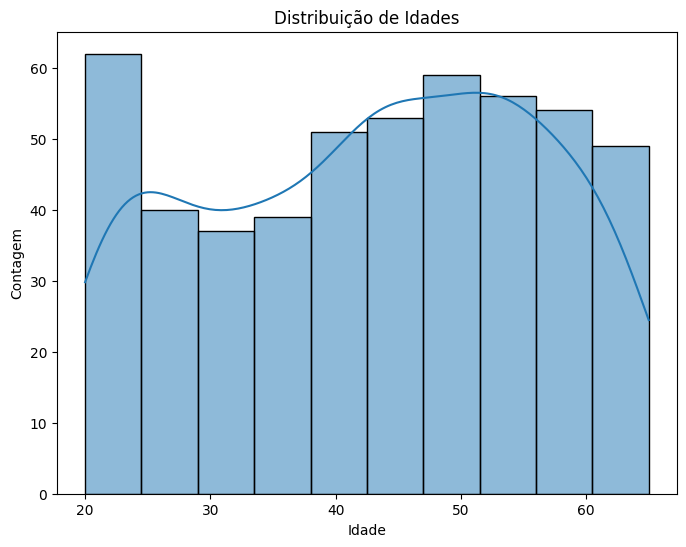

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(df_dsa['Idade'], kde=True)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()
